# Solution - 1 (Assignment-2)
### Created by Akash Bhardwaj

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import metrics
%matplotlib inline

In [2]:
# To load the training data
train_data = pd.read_csv('train.csv')

#### Data Analysis

In [3]:
train_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [4]:
train_data.shape

(466, 11)

In [5]:
train_data.isnull().sum()
# Shows one column has some null values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [6]:
# To fill the null values by finding the mean
ratio=round(train_data["Albumin_and_Globulin_Ratio"].mean(),2)
train_data["Albumin_and_Globulin_Ratio"].fillna(ratio,inplace=True)

In [7]:
train_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

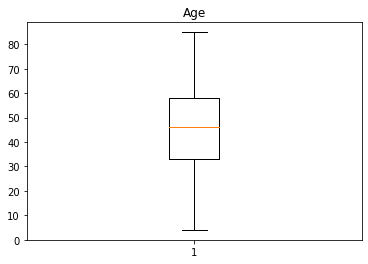

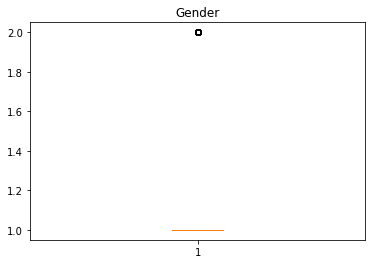

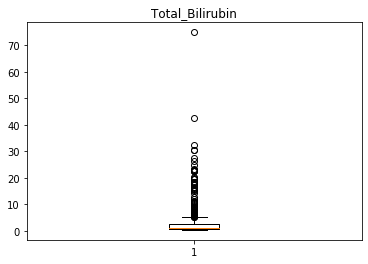

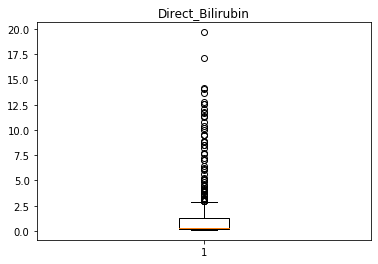

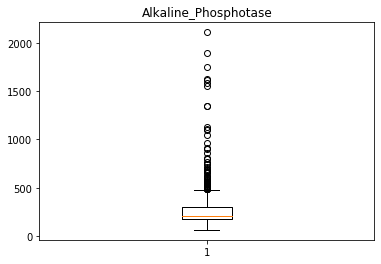

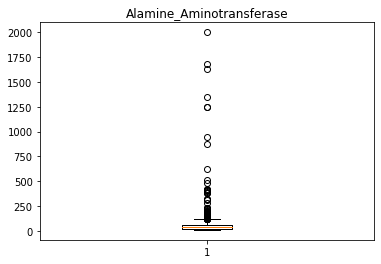

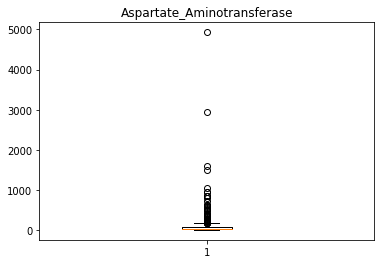

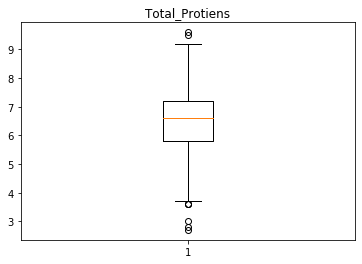

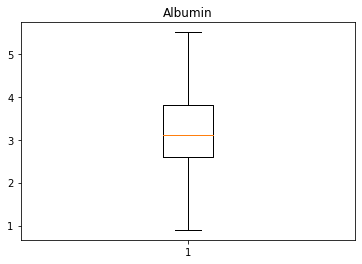

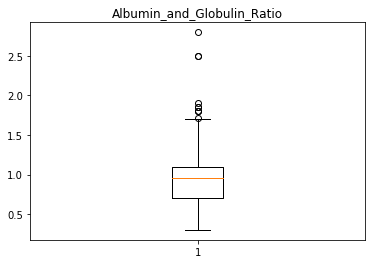

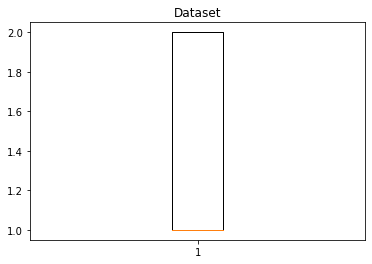

In [29]:
# To detect the outliers in the dataset but we found that there are only some outliers that may not affect our data that much.
cols = np.array(train_data.columns)
cols
for i in range(len(cols)):
    plt.boxplot(train_data[cols[i]])
    plt.title(cols[i])
    plt.show()

#### Data Visualization

Number of 1 :  333
Number of 2 :  133


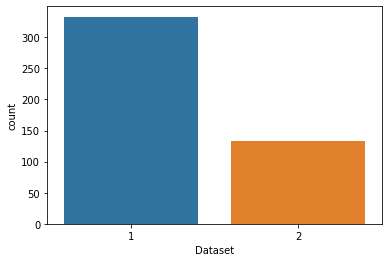

In [9]:
sb.countplot(data=train_data, x = 'Dataset', label='Count')

D1, D2 = train_data['Dataset'].value_counts()
print('Number of 1 : ',D1)
print('Number of 2 : ',D2)

Number of male:  361
Number of female:  105

Gender Classification (1-Male, 2-Female)


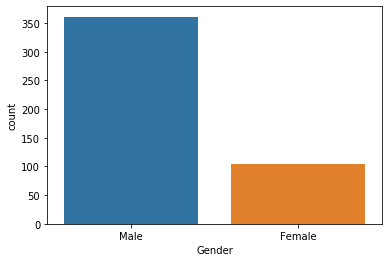

In [10]:
sb.countplot(data=train_data, x = 'Gender', label='Count')

M, F = train_data['Gender'].value_counts()
print('Number of male: ',M)
print('Number of female: ',F)
print('\nGender Classification (1-Male, 2-Female)')

##### Factors affecting the dataset

In [11]:
train_data[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False).reset_index(drop=True)

,Dataset,Gender,Age
0,2,Female,34
1,2,Male,99
2,1,Female,71
3,1,Male,262


In [12]:
train_data[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False).reset_index(drop=True)

,Dataset,Gender,Age
0,2,Female,44.911765
1,2,Male,40.909091
2,1,Female,44.239437
3,1,Male,47.335878


Text(0.5, 0.98, 'Dataset by Gender and Age')

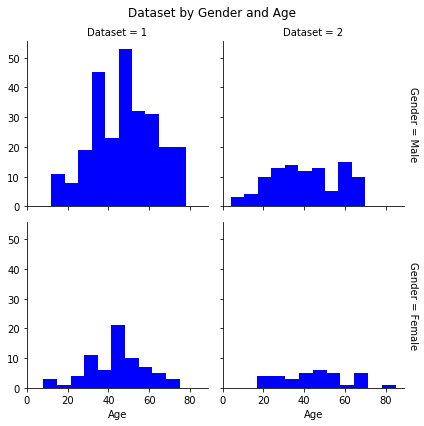

In [13]:
# It shows the gender and age is affecting the dataset

g = sb.FacetGrid(train_data, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dataset by Gender and Age')

##### To find the correlation between features of the data

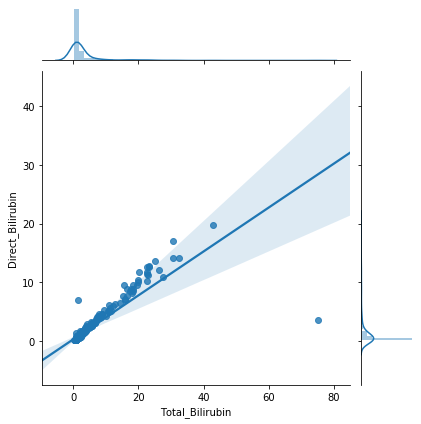

In [14]:
sb.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=train_data, kind="reg")

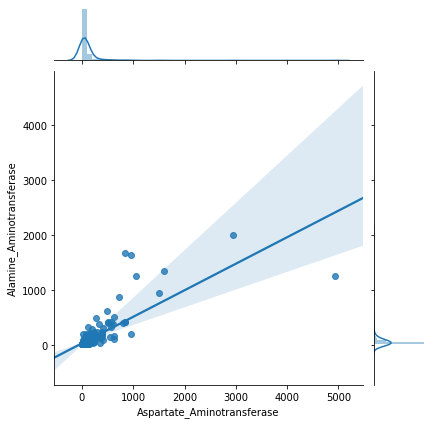

In [15]:
sb.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=train_data, kind="reg")

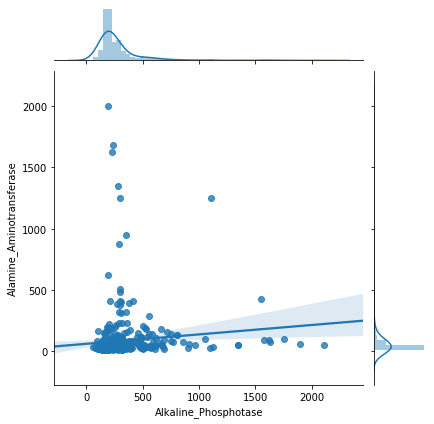

In [16]:
sb.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=train_data, kind="reg")

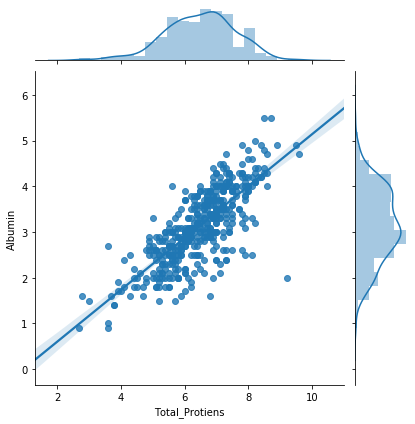

In [17]:
sb.jointplot("Total_Protiens", "Albumin", data=train_data, kind="reg")

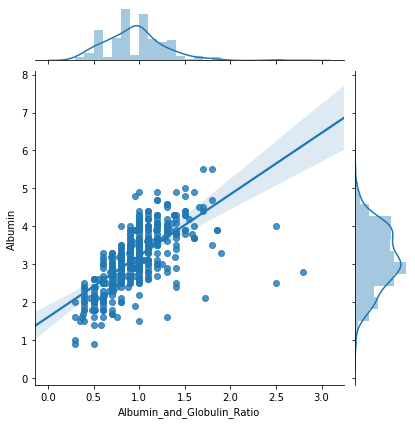

In [18]:
sb.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=train_data, kind="reg")

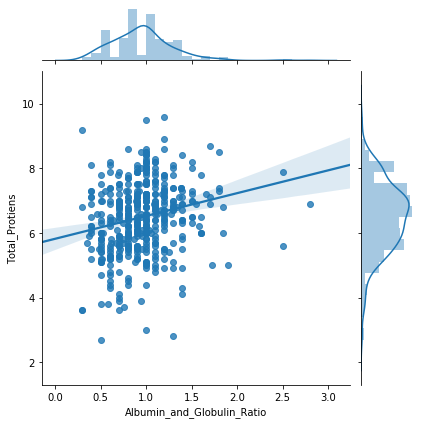

In [19]:
sb.jointplot("Albumin_and_Globulin_Ratio", "Total_Protiens", data=train_data, kind="reg")

##### Observations:-
From the above jointplot graphs we have found that there are some features that highly correlated to each other:-
##### i) Direct_Bilirubin & Total_Bilirubin
##### ii) Aspartate_Aminotransferase & Alamine_Aminotransferase
##### iii) Total_Protiens & Albumin
##### iv) Albumin_and_Globulin_Ratio & Albumin

In [20]:
# Gender column is of object type but we need to convert it in numerical form to include in our ML algorithm
train_data['Gender']=train_data.Gender.map({'Male':1,'Female':2})

In [21]:
train_data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,45.321888,1.225322,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954077,1.285408
std,15.697936,0.418243,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.332568,0.452094
min,4.000000,1.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,1.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,2.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [22]:
# Features are all the columns except Dataset column because it is for prediction
X = train_data[['Age', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio','Gender']]
X.head(3)

,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender
0,60,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0.2,158,21,16,6.0,3.0,1.00,2
2,60,9.5,466,46,52,6.1,2.0,0.40,1


In [23]:
# y is the prediction variable that has only two values 1 or 2
y = train_data['Dataset']

In [24]:
# We can find the correlation among our features
train_data_corr = X.corr()
train_data_corr

,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender
Age,1.000000,0.004349,0.112266,-0.066935,0.005839,-0.202705,-0.281515,-0.220886,-0.029741
Direct_Bilirubin,0.004349,1.000000,0.186806,0.235821,0.260630,0.023680,-0.213277,-0.173632,-0.118208
Alkaline_Phosphotase,0.112266,0.186806,1.000000,0.100744,0.151079,-0.023904,-0.165888,-0.238983,0.044595
Alamine_Aminotransferase,-0.066935,0.235821,0.100744,1.000000,0.784251,-0.033468,-0.010968,0.015340,-0.090474
Aspartate_Aminotransferase,0.005839,0.260630,0.151079,0.784251,1.000000,-0.016300,-0.075667,-0.059722,-0.086366
Total_Protiens,-0.202705,0.023680,-0.023904,-0.033468,-0.016300,1.000000,0.773420,0.214222,0.140011
Albumin,-0.281515,-0.213277,-0.165888,-0.010968,-0.075667,0.773420,1.000000,0.669385,0.139308
Albumin_and_Globulin_Ratio,-0.220886,-0.173632,-0.238983,0.015340,-0.059722,0.214222,0.669385,1.000000,0.015490
Gender,-0.029741,-0.118208,0.044595,-0.090474,-0.086366,0.140011,0.139308,0.015490,1.000000


Text(0.5, 1, 'Correlation between features')

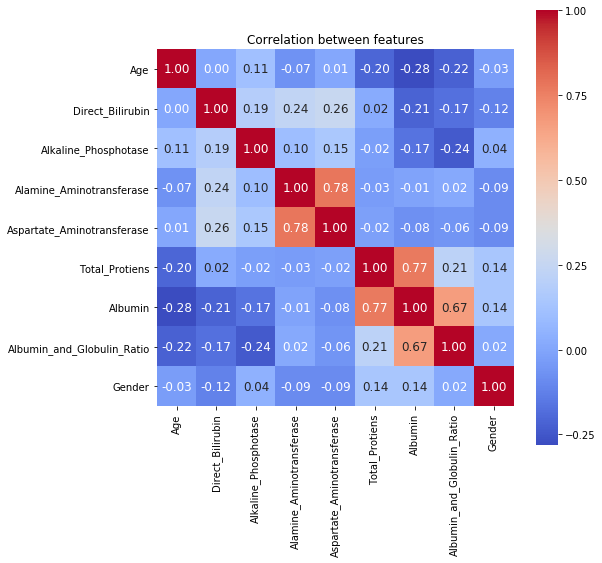

In [25]:
plt.figure(figsize=(8, 8))
sb.heatmap(train_data_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           cmap= 'coolwarm')
plt.title('Correlation between features')

#### Heatmap observations on features
##### Heatmap is used to show the correlation among our features. It shows:-
##### i) Total_Protiens & Albumin
##### ii) Alamine_Aminotransferase & Aspartate_Aminotransferase
##### iii) Direct_Bilirubin & Total_Bilirubin
##### iv) There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

### Applying the ML Algorithm

#### i) Logistic Regression

In [26]:
# To split our dataset in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [27]:
# To scale the data
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))


Accuracy: 
 0.7777777777777778
Confusion Matrix: 
 [[83  7]
 [19  8]]


c:\users\akash bhardwaj\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### We have achieved 77.77% accuracy with Logistic Regression. We can try with another algorithm

#### ii) KNN (K-Nearest Neighbors)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
model_knn=KNeighborsClassifier(n_neighbors=20)
model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7521367521367521

#### We have achieved 75.21% accuracy with KNN. We can try with another algorithm

#### iii) Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7008547008547008

#### We have achieved 70.08% accuracy with RandomForest. We can try with another algorithm

#### iv) Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [36]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


#### We have achieved 66.66% accuracy with Decision Tree.
#### So far we have applied various algorithm but found that only logistic algorithm gives the best result out of all.

### To insert the dataset (predicted) values according to Logistic Regression model

In [38]:
X = train_data[['Age', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio','Gender']]

y = train_data['Dataset']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()

logreg.fit(X, y)

c:\users\akash bhardwaj\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# To load the test.csv file
test_data=pd.read_csv('test.csv')
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [40]:
test_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
dtype: int64

In [41]:
# To change the gender column (where 1 is replaced with Male and 2 is replaced with Female)
test_data['Gender']=test_data.Gender.map({'Male':1,'Female':2})
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,2,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00


In [42]:
# To fill the value where we have seen null values
t_ratio=round(test_data["Albumin_and_Globulin_Ratio"].mean(),2)
test_data["Albumin_and_Globulin_Ratio"].fillna(ratio,inplace=True)

In [43]:
test_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [44]:
X_test = test_data[['Age', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio','Gender']]

In [45]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [46]:
test_data['Dataset']=y_pred

In [47]:
test_data['Gender']=test_data.Gender.map({1:'Male',2:'Female'})

In [48]:
test_data.to_csv('prob_1_Akash_Bhardwaj_test.csv',index=False)